#### **Introduction:**
This data analysis project aims to explore the relationships between various health-related features and the likelihood of diabetes using the well-known diabetes dataset. The dataset encompasses key attributes such as glucose levels, BMI, age, and pregnancy history.

#### **Objective:**
The primary objective is to identify significant factors associated with the presence of diabetes, leveraging statistical measures like correlations and p-values. Through this analysis, we aim to gain insights into potential predictors and contribute to a better understanding of the risk factors contributing to diabetes in the given population.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
diabetes_df = df.copy(deep=True)

### **Performing Exploratory Data Analysis:**

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.shape

(768, 9)

- The dataset has 768 rows and 9 columns.

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- There is no null value in the dataset.

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df.duplicated().any()

False

In [ ]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
diabetes_df['Outcome'].unique()

array([1, 0])

In [ ]:
diabetes_df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
diabetes_df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [ ]:
diabetes_df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [ ]:
diabetes_df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [ ]:
diabetes_df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [ ]:
diabetes_df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [ ]:
diabetes_df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

- We can see the presence of outliers in some columns.

In [ ]:
diabetes_c = diabetes_df.copy(deep=True)

## **Data Visualization on Raw Data:**

In [ ]:
diabetes_c['Outcome'] = diabetes_c['Outcome'].map({0: 'Non Diabetic', 1:'Diabetic'})

### **Univariate Data Analysis:**

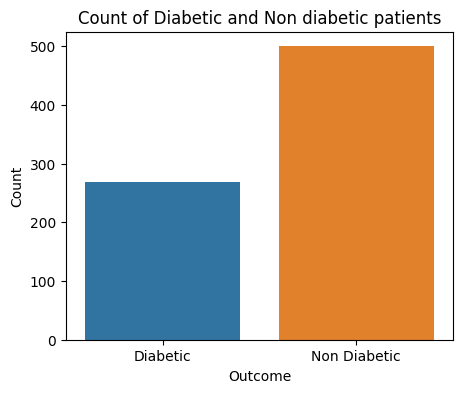

In [ ]:
# Countplot of Attrition
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.countplot(data=diabetes_c, x='Outcome')
plt.title('Count of Diabetic and Non diabetic patients')
# plt.xlabel('Diabetic or Not')
plt.ylabel('Count')
plt.show()


- From the above we can see there is approximately 280 to 290 Diabetic patients are present in the dataset.

#### **Bi-variate Analysis:**

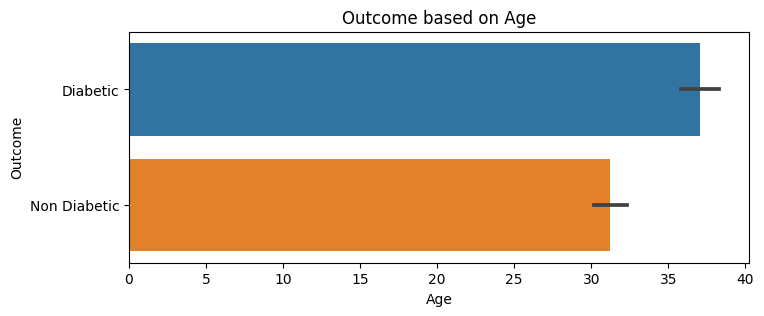

In [ ]:
# Bar plot of Attrition based on Age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.barplot(data=diabetes_c, x='Age', y='Outcome')
plt.title('Outcome based on Age')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()

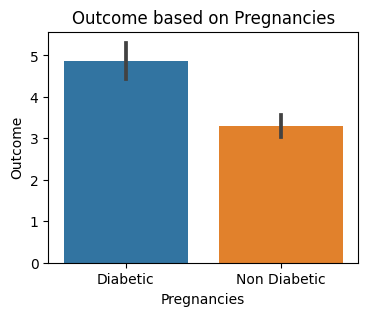

In [ ]:
# Bar plot of Attrition based on Age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.barplot(data=diabetes_c, x='Outcome', y='Pregnancies')
plt.title('Outcome based on Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')
plt.show()

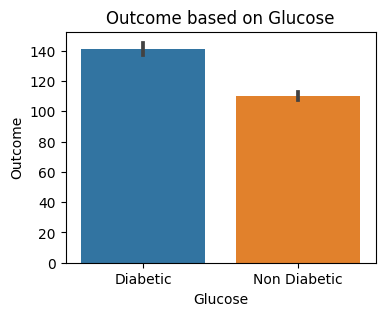

In [ ]:
# Bar plot of Attrition based on Age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.barplot(data=diabetes_c, x='Outcome', y='Glucose')
plt.title('Outcome based on Glucose')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

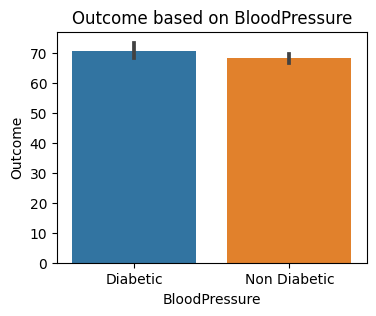

In [ ]:
# Bar plot of Attrition based on Age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.barplot(data=diabetes_c, x='Outcome', y='BloodPressure')
plt.title('Outcome based on BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.show()

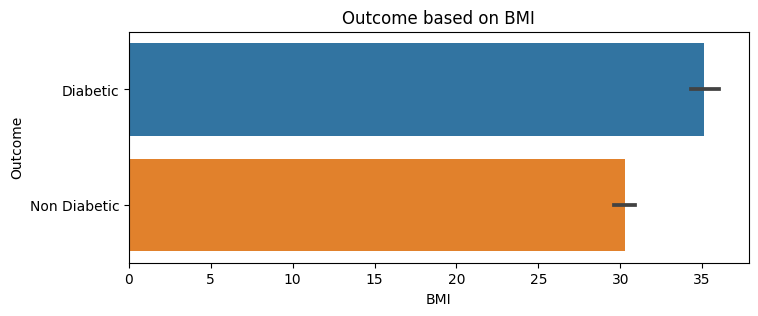

In [ ]:
# Bar plot of Attrition based on Age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.barplot(data=diabetes_c, x='BMI', y='Outcome')
plt.title('Outcome based on BMI')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.show()

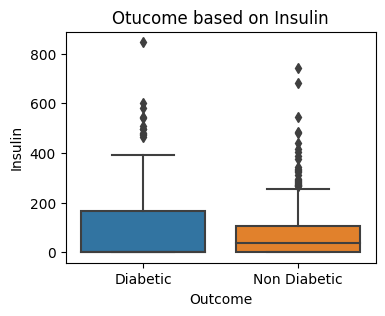

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.boxplot(data=diabetes_c, x='Outcome', y='Insulin')
plt.title('Otucome based on Insulin')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.show()


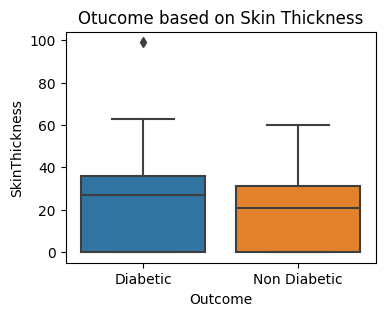

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.boxplot(data=diabetes_c, x='Outcome', y='SkinThickness')
plt.title('Otucome based on Skin Thickness')
plt.xlabel('Outcome')
plt.ylabel('SkinThickness')
plt.show()


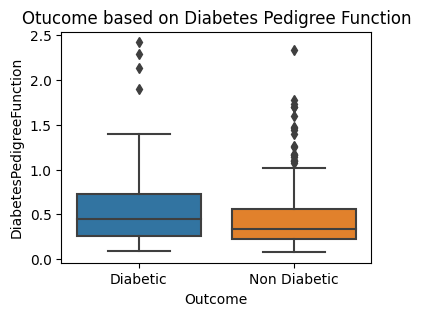

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.boxplot(data=diabetes_c, x='Outcome', y='DiabetesPedigreeFunction')
plt.title('Otucome based on Diabetes Pedigree Function')
plt.xlabel('Outcome')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()


- It shows a plot of outcome based on diabetes pedigree function. Diabetic patients have a higher outcome than non-diabetic patients.

#### **Multi-variate Analysis:**

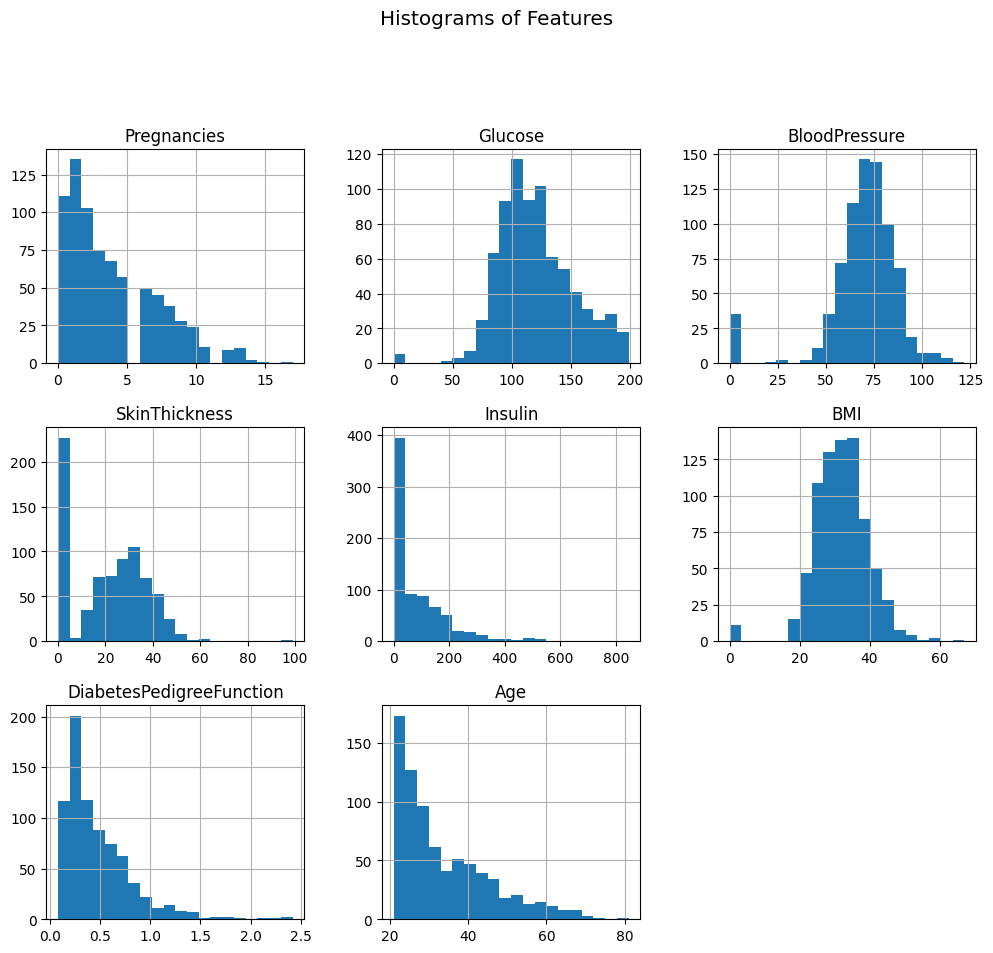

In [ ]:
diabetes_c.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Features', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.show()

### **Dealing with Outliers:**

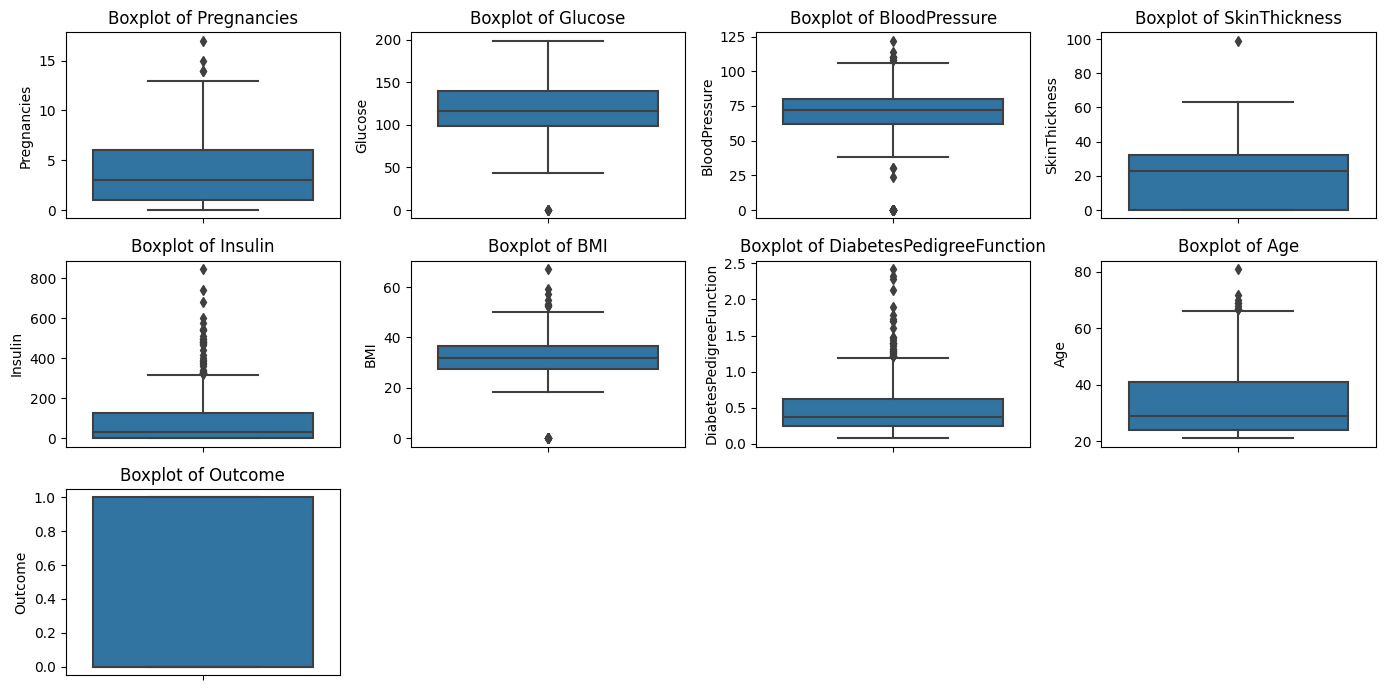

In [ ]:
# Set up subplots
plt.figure(figsize=(14, 7))

# Create boxplots for each numerical column
for i, column in enumerate(diabetes_c, 1):
    plt.subplot(3, 4, i)  # Adjust the subplot layout as needed
    sns.boxplot(data=diabetes_df, y=column)
    plt.title(f'Boxplot of {column}')

# Show the boxplots
plt.tight_layout()
plt.show()

In [ ]:
# import numpy as np
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR


In [ ]:
def count_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = diabetes_df[(diabetes_df[column] < lower_bound) | (diabetes_df[column] > upper_bound)]
    return outliers.shape[0]

# Count outliers for each numeric column
numeric_columns = diabetes_df.select_dtypes(include=[np.number]).columns
outliers_count = pd.Series({column: count_outliers(column) for column in numeric_columns})
print("Number of outliers in each numeric column:")
print(outliers_count)

Number of outliers in each numeric column:
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [ ]:
# Define a function to count outliers
def count_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = diabetes_df[(diabetes_df[column] < lower_bound) | (diabetes_df[column] > upper_bound)]
    return outliers.shape[0]

# Count outliers for each numeric column
numeric_columns = diabetes_df.select_dtypes(include=[np.number]).columns
outliers_count = sum(count_outliers(column) for column in numeric_columns)

print("Total number of outliers in the dataset:", outliers_count)

Total number of outliers in the dataset: 146


### **Removing Outliers:**

In [ ]:
# Define a function to filter outliers
def filter_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    return (diabetes_df[column] >= lower_bound) & (diabetes_df[column] <= upper_bound)

# Create a mask to filter outliers for each numeric column
numeric_columns = diabetes_df.select_dtypes(include=[np.number]).columns
outliers_mask = np.all(np.column_stack([filter_outliers(column) for column in numeric_columns]), axis=1)

# Create a new DataFrame without outliers
diabetes_no_outliers = diabetes_df[outliers_mask]

# Print the shape of the new DataFrame
print("Shape of the DataFrame without outliers:", diabetes_no_outliers.shape)

Shape of the DataFrame without outliers: (639, 9)


#### **After Removing Outliers:**

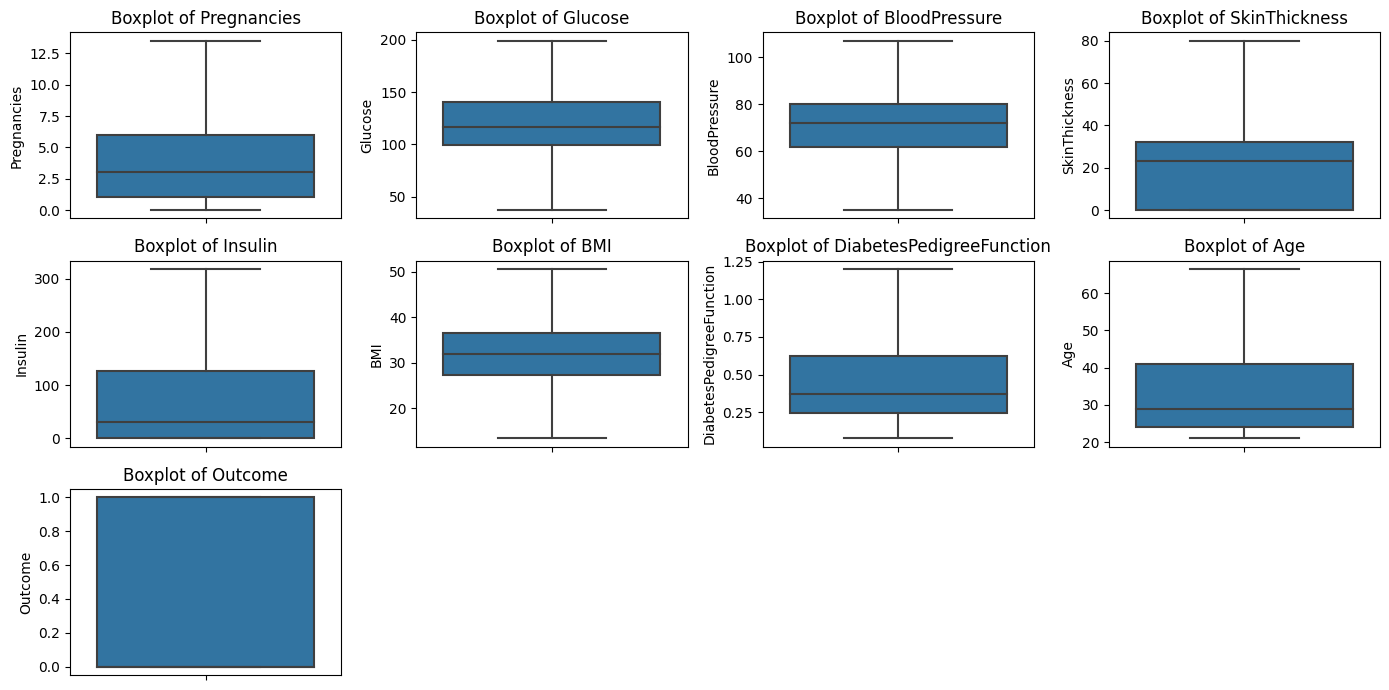

In [ ]:
# Set up subplots
plt.figure(figsize=(14, 7))

# Create boxplots for each numerical column
for i, column in enumerate(diabetes_no_outliers, 1):
    plt.subplot(3, 4, i)  # Adjust the subplot layout as needed
    sns.boxplot(data=diabetes_no_outliers, y=column)
    plt.title(f'Boxplot of {column}')

# Show the boxplots
plt.tight_layout()
plt.show()

In [ ]:
diabetes = diabetes_no_outliers.copy(deep=True)

#### **Data Visualization After Removing Outliers:**

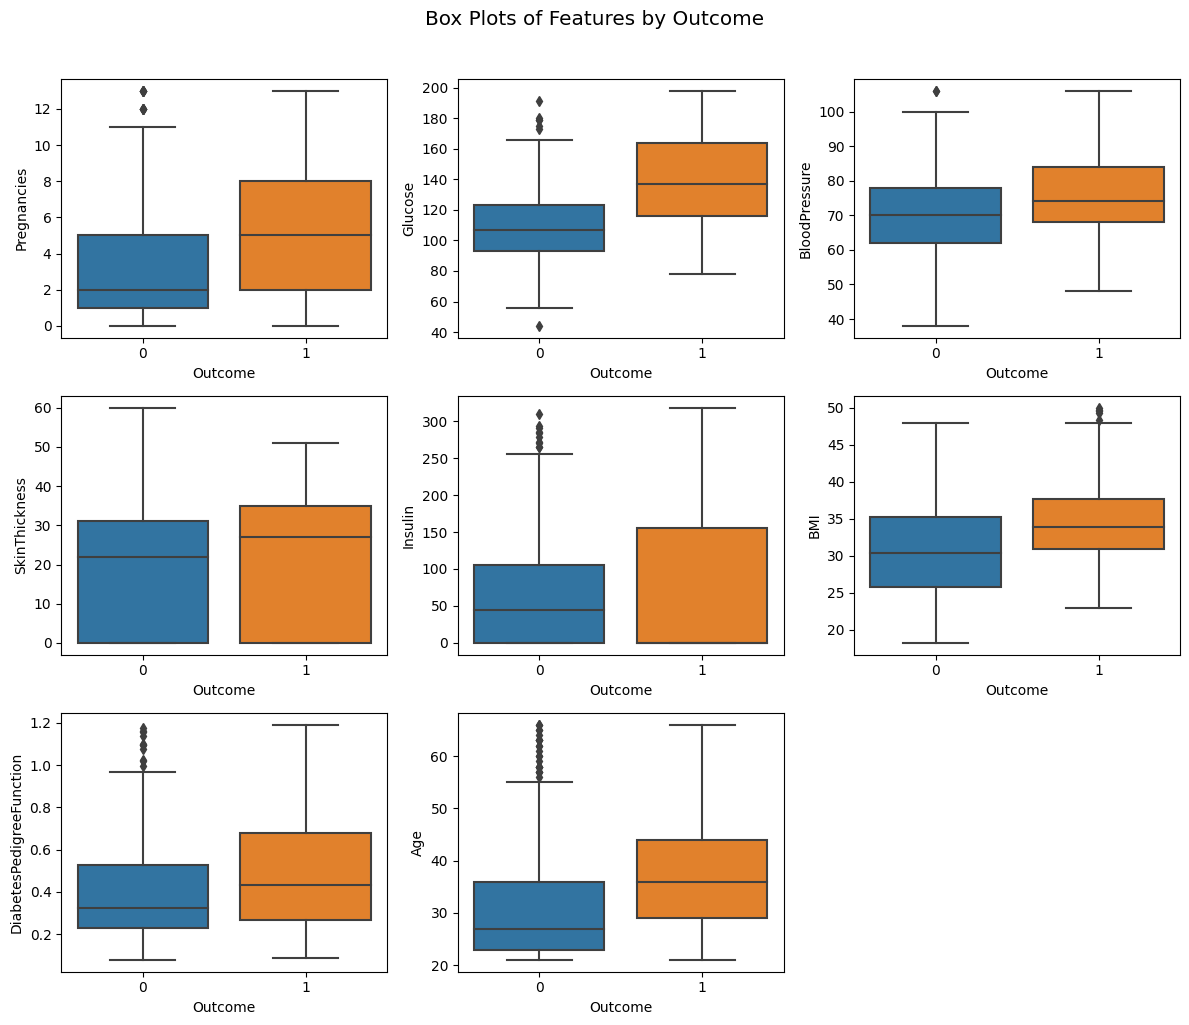

In [ ]:
# Box plots for individual features
plt.figure(figsize=(12, 10))
for i, column in enumerate(diabetes.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=diabetes)
plt.suptitle('Box Plots of Features by Outcome', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.tight_layout()
plt.show()

#### **Dealing with Skewness:**

In [ ]:
diabetes.skew()

Pregnancies                 0.853962
Glucose                     0.417946
BloodPressure              -0.406036
SkinThickness               0.026663
Insulin                     1.173898
BMI                         0.135809
DiabetesPedigreeFunction    1.024428
Age                         1.067170
Outcome                     0.635017
dtype: float64

<Figure size 300x600 with 0 Axes>

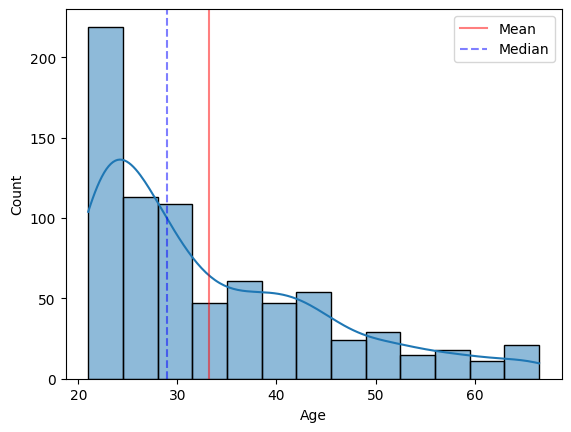

<Figure size 300x600 with 0 Axes>

In [ ]:
sns.histplot(data = diabetes['Age'], kde = True)
plt.axvline(x=diabetes.Age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes.Age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.figure(figsize=(3, 6))

In [ ]:
diabetes_transformed = diabetes.copy(deep=True)

In [ ]:
import numpy as np

diabetes_transformed['DiabetesPedigreeFunction'] = np.log1p(diabetes_transformed['DiabetesPedigreeFunction'])
diabetes_transformed['Age'] = np.log1p(diabetes_transformed['Age'])

In [ ]:
from scipy.stats import boxcox

# Note: Box-Cox requires positive values, so you might need to shift the values if there are zeros.
diabetes_transformed['Insulin'] = boxcox(diabetes_transformed['Insulin'] + 1)[0]
diabetes_transformed['BloodPressure'] = boxcox(diabetes_transformed['BloodPressure'] + 1)[0]

In [ ]:
diabetes_transformed.skew()

Pregnancies                 0.853962
Glucose                     0.417946
BloodPressure               0.024697
SkinThickness               0.026663
Insulin                     0.037553
BMI                         0.135809
DiabetesPedigreeFunction    0.703791
Age                         0.593359
Outcome                     0.635017
dtype: float64

In [ ]:
# diabetes_data = diabetes_transformed.copy(deep=True)

In [ ]:
Corr = diabetes.corr().round(3)

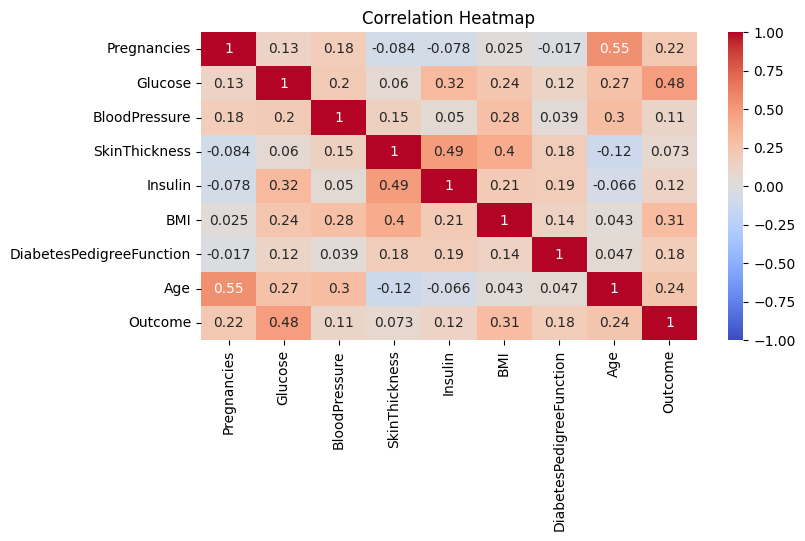

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(Corr, annot=True, cbar=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr

# Assuming 'diabetes' is your DataFrame
outcome_correlations = {'Feature': [], 'Correlation': [], 'P-Value': []}

# Iterate through each feature (excluding 'Outcome' itself)
for column in diabetes.columns[:-1]:
    correlation, p_value = pointbiserialr(diabetes['Outcome'], diabetes[column])
    outcome_correlations['Feature'].append(column)
    outcome_correlations['Correlation'].append(correlation)
    outcome_correlations['P-Value'].append(p_value)

# Create a DataFrame from the results
result_df = pd.DataFrame(outcome_correlations)

# Print or analyze the DataFrame
print(result_df)

                    Feature  Correlation       P-Value
0               Pregnancies     0.220392  6.666771e-10
1                   Glucose     0.479158  2.461960e-45
2             BloodPressure     0.113301  1.661358e-03
3             SkinThickness     0.073125  4.277328e-02
4                   Insulin     0.124721  5.316746e-04
5                       BMI     0.309739  1.539591e-18
6  DiabetesPedigreeFunction     0.184969  2.439853e-07
7                       Age     0.242702  9.284605e-12


- All p-values are very small (close to zero), indicating that the correlations between each feature and the 'Outcome' variable are statistically significant.

- Features such as Glucose, BMI, Age, and Pregnancies have exceptionally low p-values, suggesting that these variables are likely to be important predictors of the 'Outcome' variable.

**Conclusion:** The analysis of the diabetes dataset reveals significant positive correlations between Glucose, BMI, Age, and Pregnancies with the likelihood of diabetes. Outliers were carefully handled to ensure robust results. The low p-values affirm the statistical significance of these associations. These findings underscore the importance of monitoring key health indicators for early diabetes detection. Future research could leverage advanced modeling techniques to enhance predictive accuracy and inform targeted interventions for at-risk individuals.